In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [37]:
df = pd.read_csv("../Data/data.csv", encoding="latin1")

In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [41]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [42]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [43]:
df.drop(columns=['CustomerID'], inplace=True)
df = df.dropna(subset=['Description'])

In [44]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [45]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 5268


In [46]:
df.drop_duplicates(inplace=True)

In [47]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


In [48]:
df['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 535187, dtype: object

In [49]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [50]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 535187, dtype: datetime64[ns]

In [51]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [52]:
df = df[df['Quantity'] > 0]

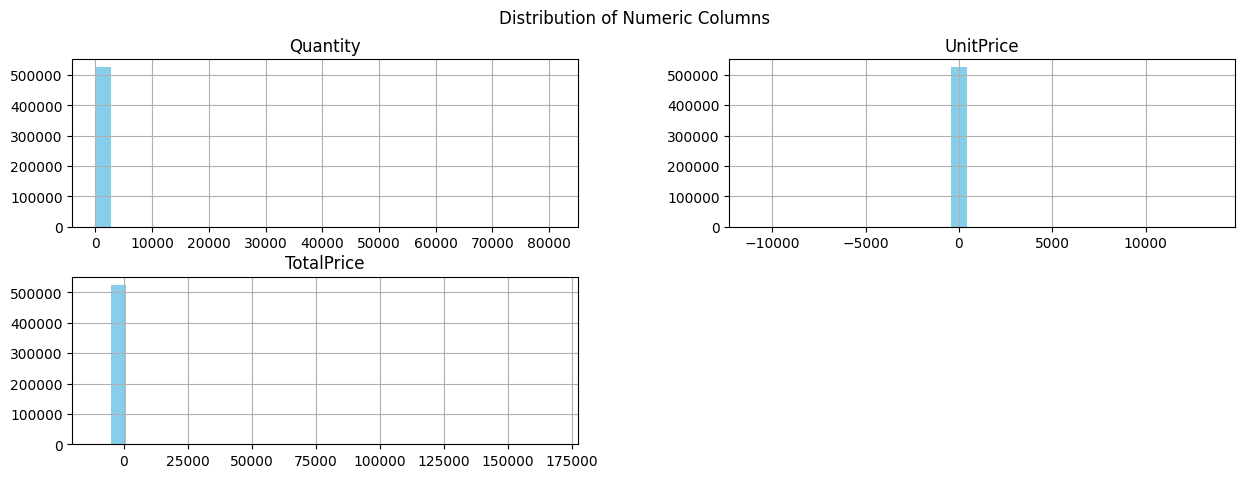

In [53]:
numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice']
df[numeric_cols].hist(figsize=(15,5), bins=30, color='skyblue')
plt.suptitle("Distribution of Numeric Columns")
plt.show()

C:\Users\m\AppData\Local\Temp\ipykernel_11408\3825232216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette=sns.light_palette("teal", n_colors=len(top_products)))


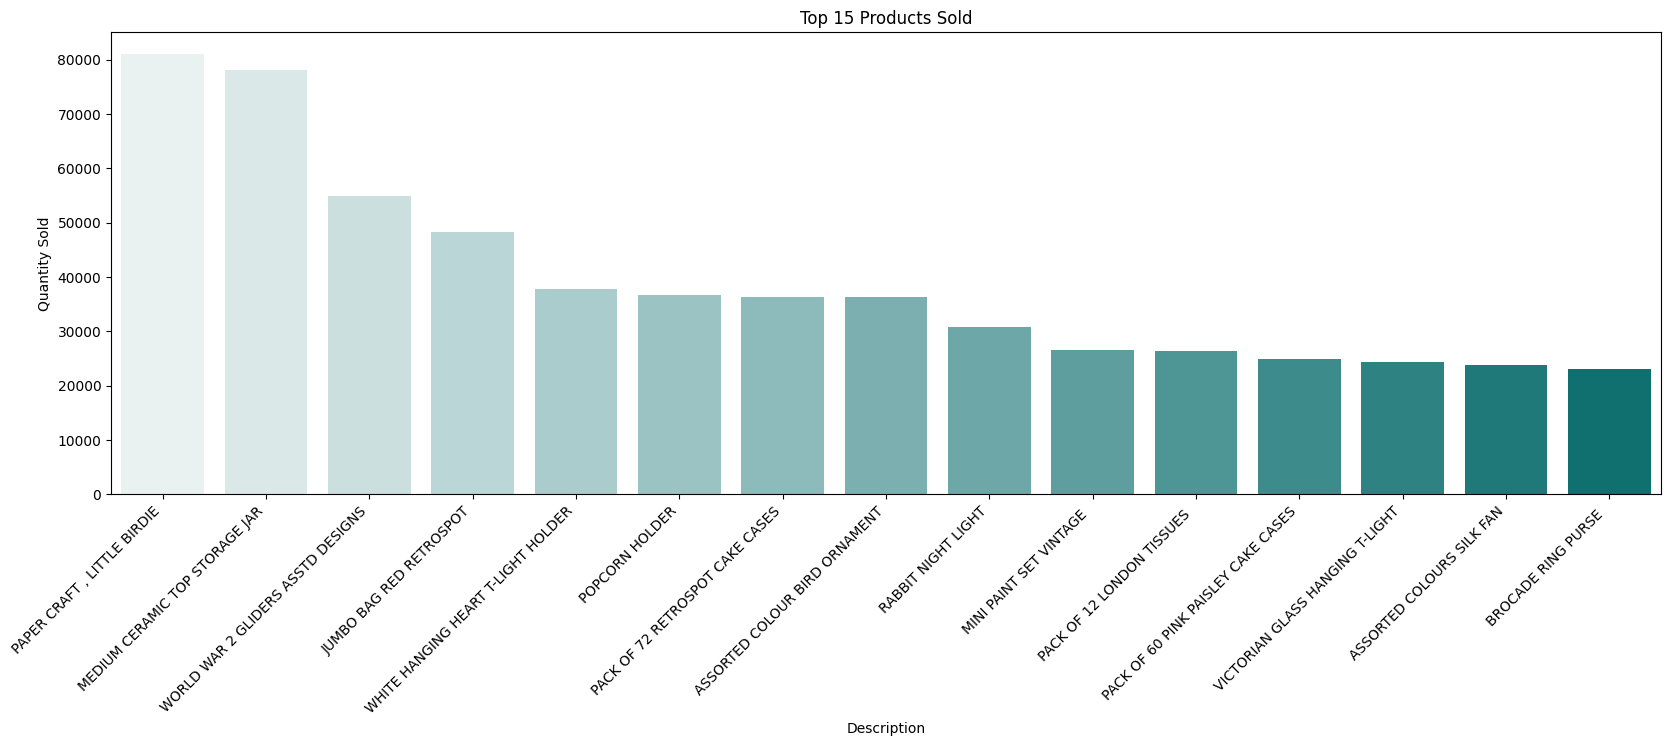

In [54]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(20,6))
sns.barplot(x=top_products.index, y=top_products.values, palette=sns.light_palette("teal", n_colors=len(top_products)))
plt.xticks(rotation=45, ha='right')
plt.ylabel("Quantity Sold")
plt.title("Top 15 Products Sold")
plt.show()

C:\Users\m\AppData\Local\Temp\ipykernel_11408\3600806267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette="coolwarm")


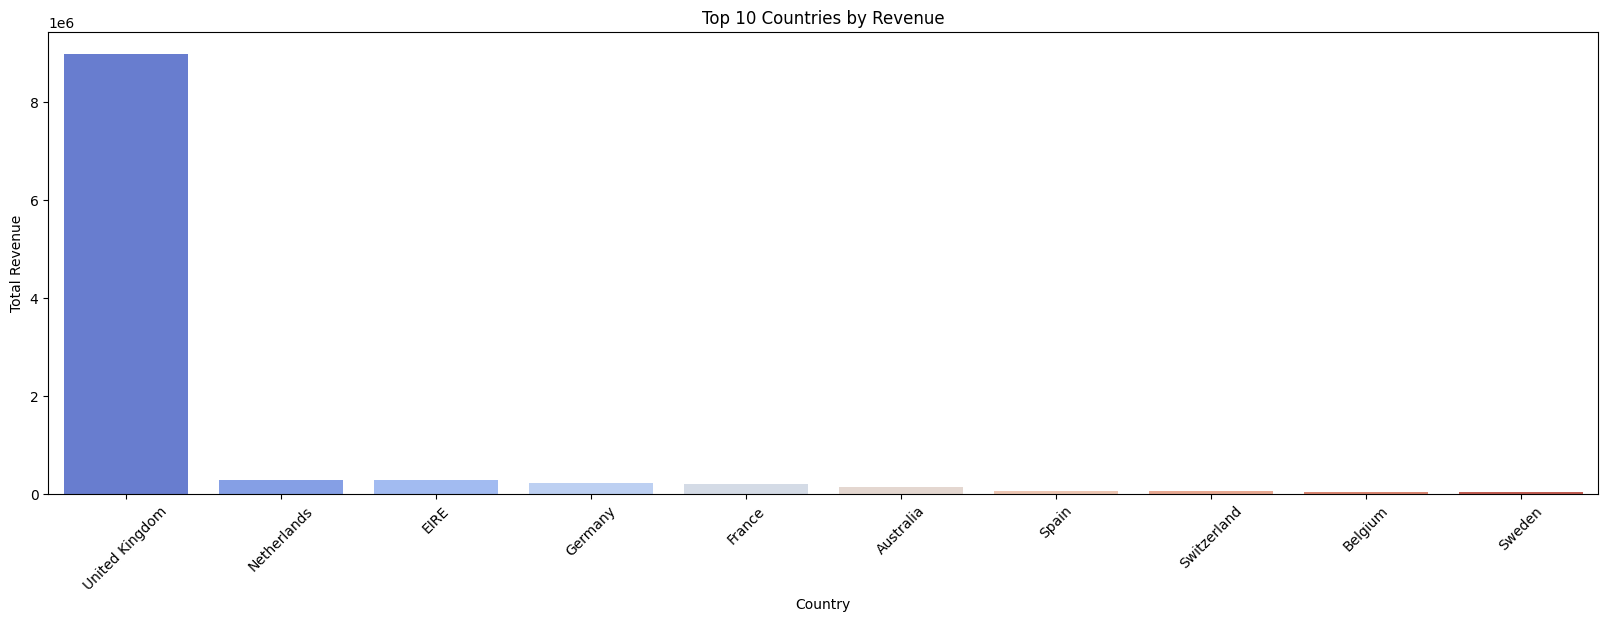

In [55]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(20,6))
sns.barplot(x=country_sales.index, y=country_sales.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Total Revenue")
plt.title("Top 10 Countries by Revenue")
plt.show()

C:\Users\m\AppData\Local\Temp\ipykernel_11408\2545591947.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()


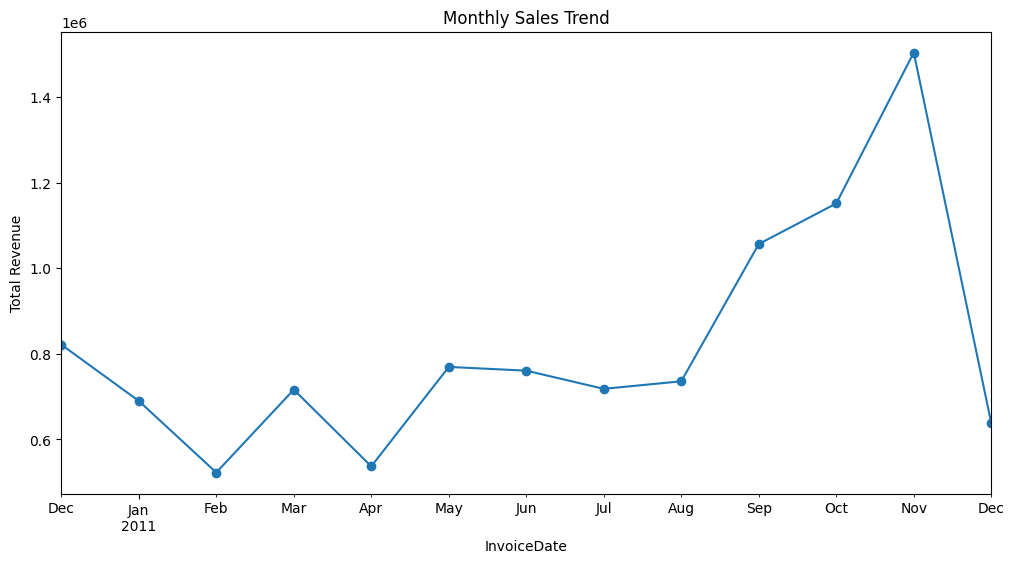

In [56]:
monthly_sales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.ylabel("Total Revenue")
plt.title("Monthly Sales Trend")
plt.show()

In [57]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('InvoiceNo').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate':'Recency','Quantity':'Frequency','TotalPrice':'Monetary'})

# نظرة على RFM
display(rfm.head())

,Recency,Frequency,Monetary
InvoiceNo,,,
536365,374,40,139.12
536366,374,12,22.20
536367,374,83,278.73
536368,374,15,70.05
536369,374,3,17.85


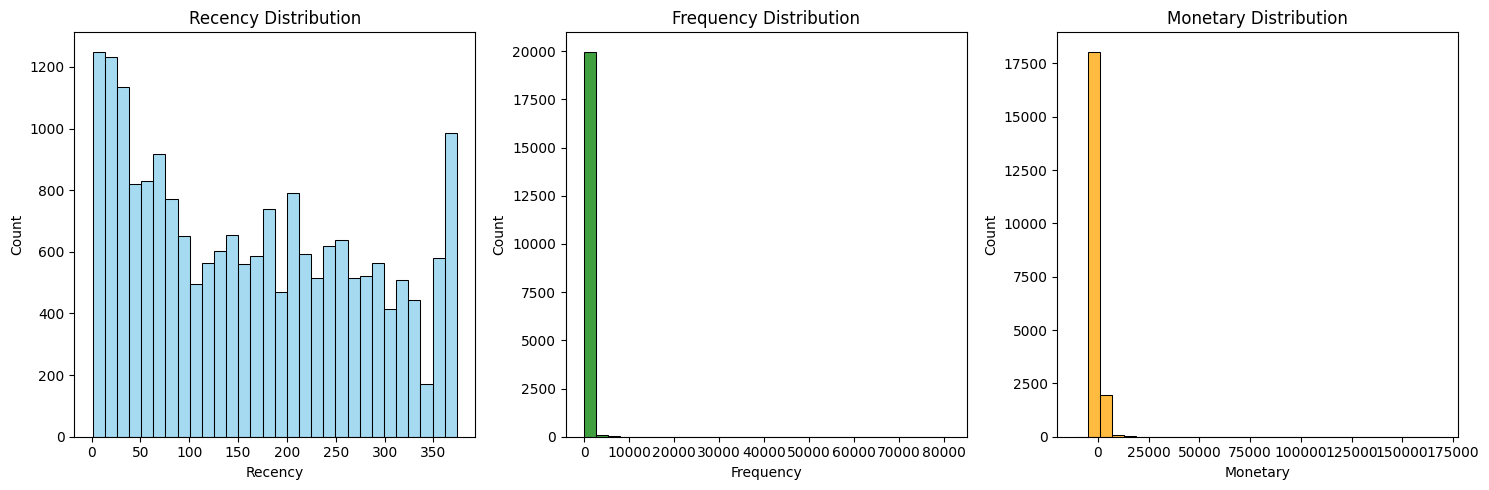

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins=30, color='skyblue')
plt.title("Recency Distribution")

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=30, color='green')
plt.title("Frequency Distribution")

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins=30, color='orange')
plt.title("Monetary Distribution")

plt.tight_layout()
plt.show()


In [59]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [60]:
sse = []
k_range = range(1,11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    sse.append(km.inertia_)
    
knee = KneeLocator(k_range, sse, curve='convex', direction='decreasing')
optimal_k = knee.knee
print("Optimal number of clusters:", optimal_k)

Optimal number of clusters: 5


In [61]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [62]:
cluster_order = rfm.groupby('Cluster')['Monetary'].mean().sort_values(ascending=False).index
rfm['Cluster'] = rfm['Cluster'].apply(lambda x: np.where(cluster_order==x)[0][0])

In [63]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean',
    'Cluster':'count'
}).rename(columns={'Cluster':'Count'})
display(cluster_summary)

,Recency,Frequency,Monetary,Count
Cluster,,,,
0,163.500000,77605.000000,122826.600000,2
1,159.066038,5481.566038,11781.479245,106
2,50.592129,263.977374,494.357764,8309
3,313.321996,232.488507,456.048559,5351
4,183.546639,225.939384,404.767931,6368


C:\Users\m\AppData\Local\Temp\ipykernel_11408\1480583127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary.index, y=cluster_summary['Recency'], ax=axes[0], palette="Blues")
C:\Users\m\AppData\Local\Temp\ipykernel_11408\1480583127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary.index, y=cluster_summary['Frequency'], ax=axes[1], palette="Greens")
C:\Users\m\AppData\Local\Temp\ipykernel_11408\1480583127.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary.index, y=cluster_summary['Monet

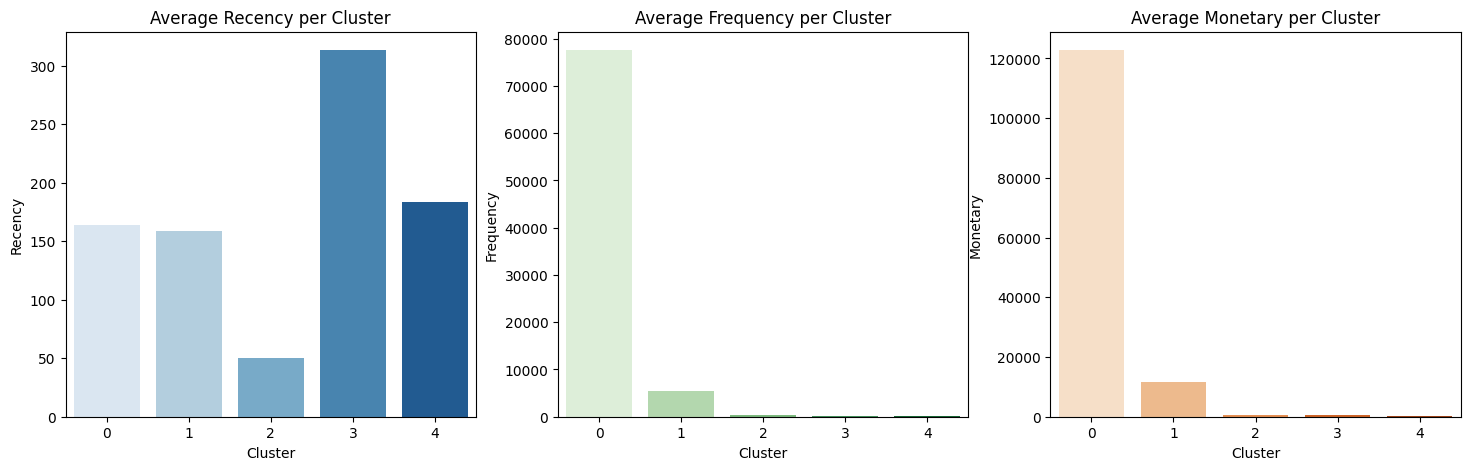

In [64]:
fig, axes = plt.subplots(1,3,figsize=(18,5))
sns.barplot(x=cluster_summary.index, y=cluster_summary['Recency'], ax=axes[0], palette="Blues")
axes[0].set_title("Average Recency per Cluster")

sns.barplot(x=cluster_summary.index, y=cluster_summary['Frequency'], ax=axes[1], palette="Greens")
axes[1].set_title("Average Frequency per Cluster")

sns.barplot(x=cluster_summary.index, y=cluster_summary['Monetary'], ax=axes[2], palette="Oranges")
axes[2].set_title("Average Monetary per Cluster")

plt.show()


In [65]:
joblib.dump(kmeans, '../Models/kMeans_model.pkl')
joblib.dump(scaler, '../Scaler/scaler.pkl')
joblib.dump(rfm, '../Models/rfm_data.pkl')
print("✅ Model, scaler, and RFM data saved successfully.")

✅ Model, scaler, and RFM data saved successfully.
